In [62]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(7,5)})

In [63]:
raw_data = np.genfromtxt('22-05-20.csv', delimiter=',')
print("Shape:", raw_data.shape)
raw_data[:10][:5]

Shape: (21100, 259)


array([[  16.,    1., -512., ...,   -1.,   -1.,   -1.],
       [  16.,    1., -512., ...,   -1.,   -1.,   -1.],
       [  16.,    1., -512., ...,   -1.,   -1.,   -1.],
       [  16.,    1., -504., ...,   -1.,   -1.,   -1.],
       [  16.,    1., -504., ...,   -1.,   -1.,   -1.]])

In [ ]:
for idx in range(raw_data.shape[0]):
    if(idx % 25 != 0):
        continue
    L = int(raw_data[idx][0])
    T = raw_data[idx][1]
    E = raw_data[idx][2]

    ax = sns.heatmap(raw_data[idx, 3:].reshape((L,L)), cbar=False, vmin=-1, vmax=1, linewidths=1);
    ax.set_title("L={:d}  T={:f}  E={:f}".format(L, T, E));
    
    fig = ax.get_figure()
    fileName = "img/{:04d} L={:d}  T={:f}  E={:f}.jpg".format(idx, L, T, E)
    #print(fileName)
    fig.savefig(fileName)
    

In [64]:
# Magnetisation
m = np.empty( raw_data.shape[0] )
T = np.empty( raw_data.shape[0] )
E = np.empty( raw_data.shape[0] )

for idx in range(raw_data.shape[0]):
    T[idx] = raw_data[idx][1] # T
    E[idx] = raw_data[idx][2] # E
    m[idx] = np.sum(raw_data[idx][3:])/(raw_data.shape[1]-3)


m_pos_mask = m > 0
m_neg_mask = m < 0

T_uniq = np.unique(T)
m_pos_T = np.empty(T_uniq.shape[0])
m_neg_T = np.empty(T_uniq.shape[0])

for i in range(T_uniq.shape[0]):
    T_mask = (T==T_uniq[i])
    m_pos_T[i] = np.sum(m[T_mask & m_pos_mask])/np.sum(T_mask & m_pos_mask)
    m_neg_T[i] = np.sum(m[T_mask & m_neg_mask])/np.sum(T_mask & m_neg_mask)
    

In [52]:
m_pos_T

array([0.99946875, 0.99840625, 0.99819196, 0.9966875 , 0.993625  ,
       0.99147321, 0.9871875 , 0.97734375, 0.96544643, 0.93947917,
       0.91851562, 0.863125  , 0.81284545, 0.69736579, 0.56441036,
       0.40425263, 0.31802519, 0.24342758, 0.2056785 , 0.19908405,
       0.18532806, 0.16883681, 0.14430894, 0.14040269, 0.140125  ,
       0.12421245, 0.12104592, 0.11397262, 0.10273755, 0.11195528,
       0.07763672])

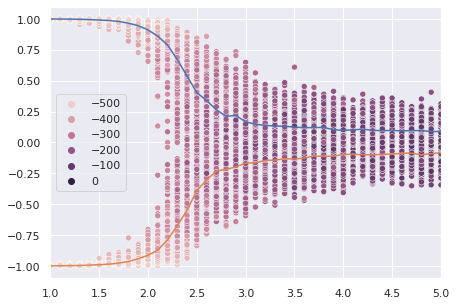

In [73]:
fig, ax = plt.subplots()
sns.scatterplot(x=T, y=m, hue=E, ax=ax)
sns.lineplot(x=T_uniq, y=m_pos_T, ax=ax)
sns.lineplot(x=T_uniq, y=m_neg_T, ax=ax)
ax.set_xlim([1, 5]);

<AxesSubplot:>

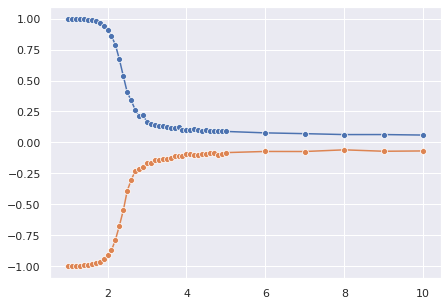

In [68]:
fig, ax = plt.subplots()
sns.lineplot(x=T_uniq, y=m_pos_T, ax=ax, marker="o")
sns.lineplot(x=T_uniq, y=m_neg_T, ax=ax, marker="o")